In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/work/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


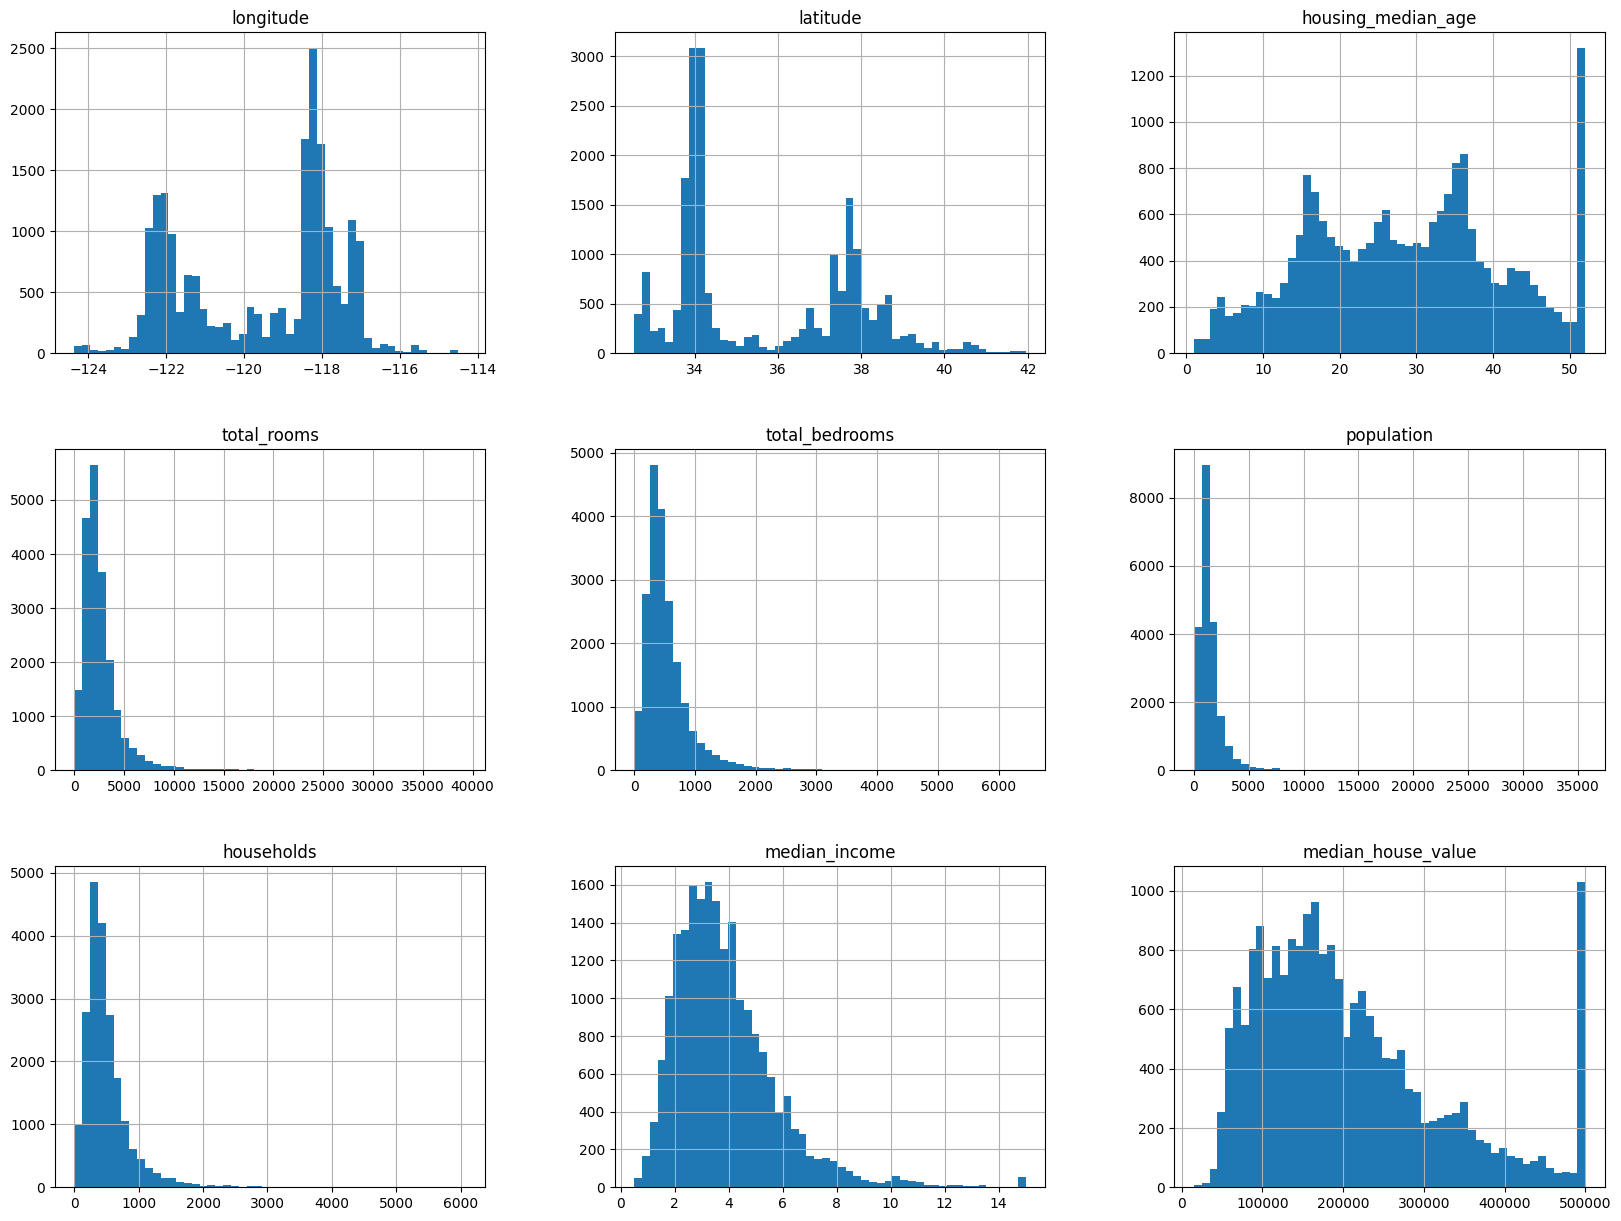

In [5]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
train_set, test_set = split_train_test(df,0.2)


In [8]:
len(train_set)


16512

In [9]:
len(test_set)

4128

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
len(train_set)

16512

In [12]:
len(test_set)

4128

In [13]:
df["income_cat"] = pd.cut(df["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

<AxesSubplot: >

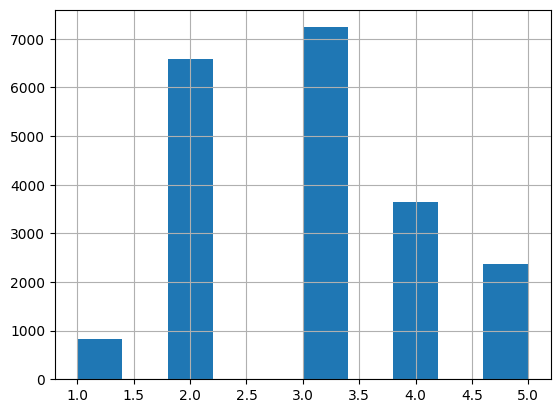

In [14]:
df["income_cat"].hist()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [16]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [17]:
for set in(strat_train_set, strat_test_set):
    set.drop("income_cat",axis=1,inplace=True)

In [18]:
df = strat_train_set.copy()

### When alpha = 1

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

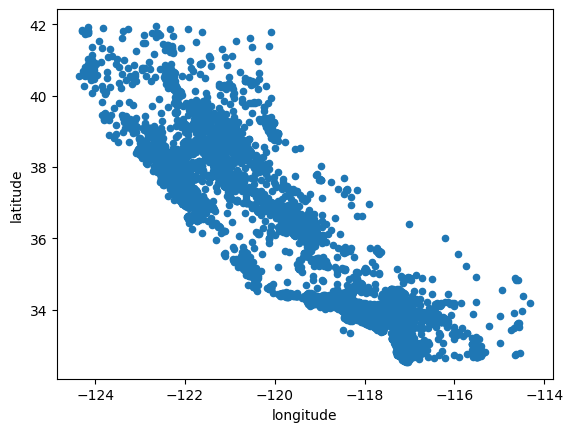

In [19]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=1)

### When alpha = 0.1

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

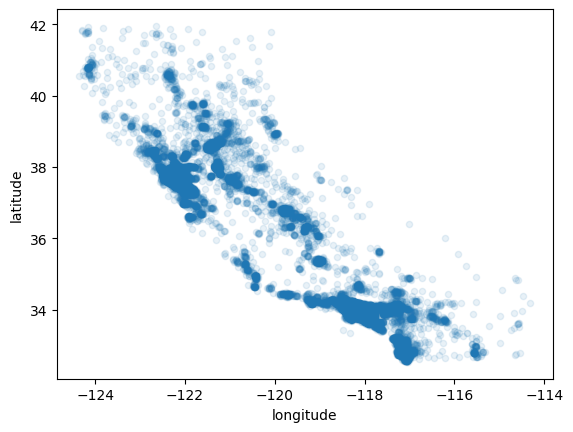

In [20]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

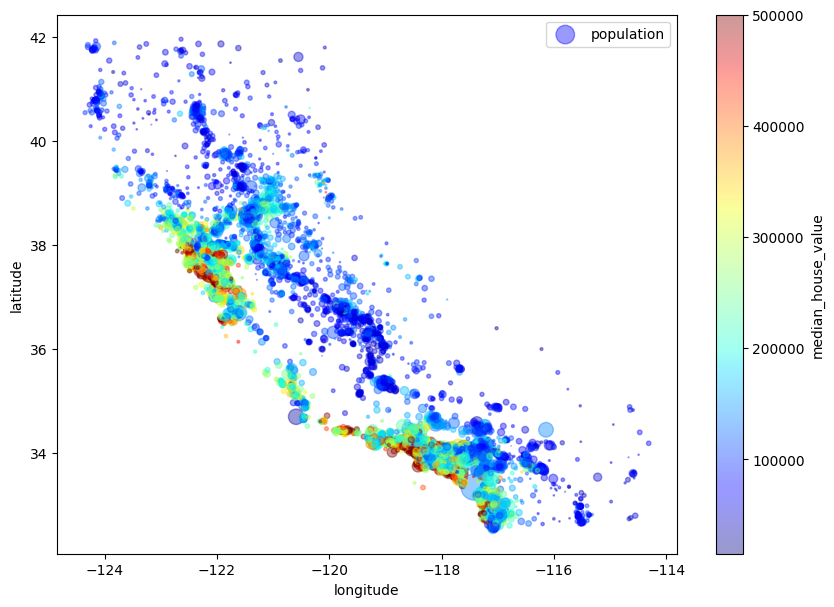

In [21]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s= df["population"]/100, label="population",figsize = (10,7), c = "median_house_value",cmap = plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [22]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot: xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot: xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='longitude'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='longitude'>,
        <AxesSubplot: xlabel='total_bedrooms', ylabel='longitude'>,
        <AxesSubplot: xlabel='population', ylabel='longitude'>,
        <AxesSubplot: xlabel='households', ylabel='longitude'>,
        <AxesSubplot: xlabel='median_income', ylabel='longitude'>,
        <AxesSubplot: xlabel='median_house_value', ylabel='longitude'>],
       [<AxesSubplot: xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot: xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='latitude'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='latitude'>,
        <AxesSubplot: xlabel='total_bedrooms', ylabel='latitude'>,
        <AxesSubplot: xlabel='population', ylabel='latitude'>,
        <AxesS

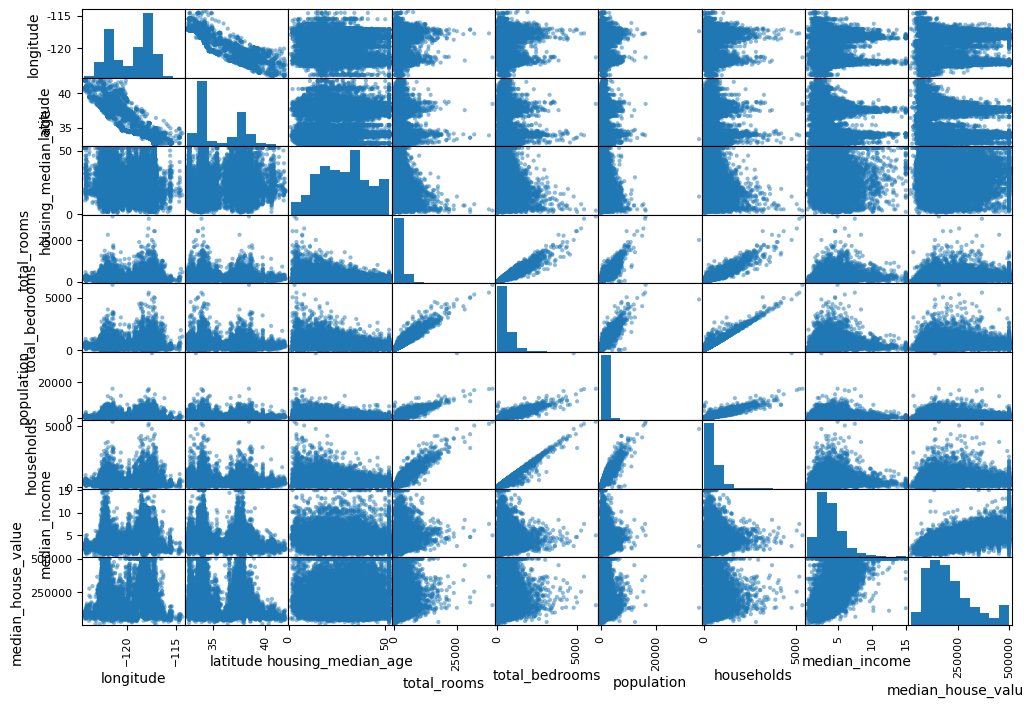

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(12,8))

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

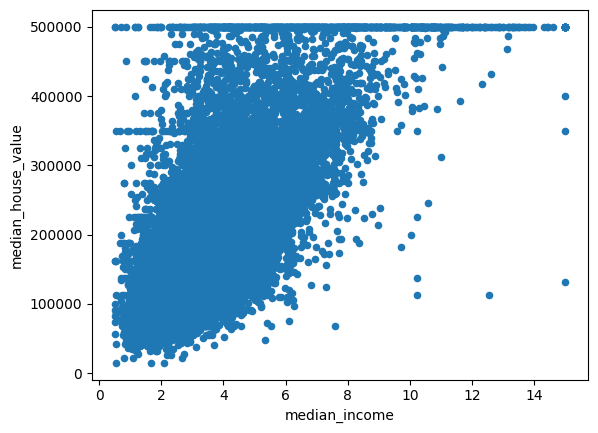

In [24]:
df.plot(kind = "scatter",x="median_income",y="median_house_value",alpha=1)

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

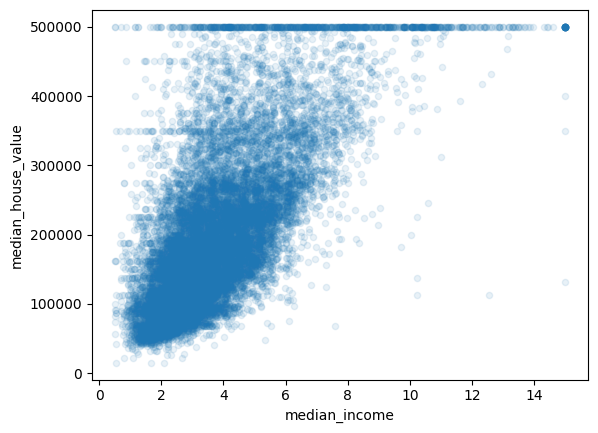

In [25]:
df.plot(kind = "scatter",x="median_income",y="median_house_value",alpha=0.1)

## Prepare the Data for Machine Learning Algorithms

In [26]:
df = strat_train_set.drop("median_house_value",axis=1)
df_labels = strat_train_set["median_house_value"].copy()

In [27]:
median = df["total_bedrooms"].median()
df["total_bedrooms"].fillna(median, inplace=True)

In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

df_num = df.drop("ocean_proximity",axis =1)
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [30]:
df_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [31]:
X = imputer.transform(df_num)

In [32]:
df_cat=df[["ocean_proximity"]]
df_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [33]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
df_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [34]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [35]:
from sklearn.preprocessing import OneHotEncoder
hot_encoder = OneHotEncoder()
df_cat_1hot = hot_encoder.fit_transform(df_cat)
df_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [36]:
df_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [37]:
hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): #no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit(self, X, y=None):
        return self #nothin else to do
    def transform(self, X):
        rooms_per_household = X[:,rooms_ix]/X[:,households_ix]
        population_per_household = X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
df_extra_attributes = attr_adder.transform(df.values)


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = "median")),

('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])

df_num_tr = num_pipeline.fit_transform(df_num)

In [40]:
from sklearn.compose import ColumnTransformer

num_attribs = list(df_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),

])
df_prepared = full_pipeline.fit_transform(df)

### Training and Evaluating on the Training Set

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)



LinearRegression()

In [42]:
some_data = df.iloc[:5]
some_labels = df_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [43]:
print("predictions: ", lin_reg.predict(some_data_prepared))

predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [44]:
print("labels:", list(some_labels))

labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [45]:
from sklearn.metrics import mean_squared_error
df_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_predictions, df_labels)
lin_rsme = np.sqrt(lin_mse)
lin_rsme


68627.87390018745

In [46]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_prepared, df_labels)

DecisionTreeRegressor()

In [47]:
df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_predictions, df_labels)
tree_rsme = np.sqrt(tree_mse)
tree_rsme

0.0

In [48]:
print(df_predicitions)

NameError: name 'df_predicitions' is not defined

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, df_prepared, df_labels, scoring="neg_mean_squared_error", cv=10)
tree_rsme_scores = np.sqrt(-scores)

In [59]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
display_scores(tree_rsme_scores)

In [61]:
lin_scores = cross_val_score(lin_reg, df_prepared, df_labels, scoring="neg_mean_squared_error", cv=10)
lin_rsme_scores = np.sqrt(-lin_scores)
display_scores(lin_rsme_scores)

In [62]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(df_prepared, df_labels)

df_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_predictions, df_labels)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


In [63]:
forest_scores = cross_val_score(forest_reg, df_prepared, df_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [66]:
import joblib
joblib.dump(forest_rmse_scores, "forest_model.pkl")
forest_model_loaded = joblib.load("forest_model.pkl")

## Fine Tune your Model

In [69]:
from sklearn.model_selection import GridSearchCV
param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(df_prepared, df_labels)


In [70]:
grid_search.best_params_

In [71]:
grid_search.best_estimator_

In [78]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=17d2748e-c8ac-4922-b92b-a46154c07520' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>